In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

#                                    (Objective)
- Gold Atlantis Bank observing a rise in the number of defaulters.
- Here, We Analyzing the credit data of Gold Atlantis Bank.
- This Analysis is help the Bank for Identify those customers who have a lower probability of becoming a defaulter


In [5]:
data = pd.read_csv(r"C:\Users\cs763\Downloads\DS1_C5_S4_Credit_Data_Hackathon.csv")

In [6]:
data.isnull().sum()
# there are 3 columns which have null values
# AMT_GOODS_PRICE           81
# NAME_TYPE_SUITE          405
# OCCUPATION_TYPE        31224
# CNT_FAM_MEMBERS            1

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [231]:
data['NAME_TYPE_SUITE'].fillna(data['NAME_TYPE_SUITE'].mode()[0],inplace=True)
data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0],inplace=True)
data['AMT_GOODS_PRICE'].fillna(data['AMT_CREDIT'],inplace=True)
data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].mode()[0],inplace=True)

In [7]:
cat = data.select_dtypes(include='object')
num = data.select_dtypes(include='number')

# Univariate Analysis

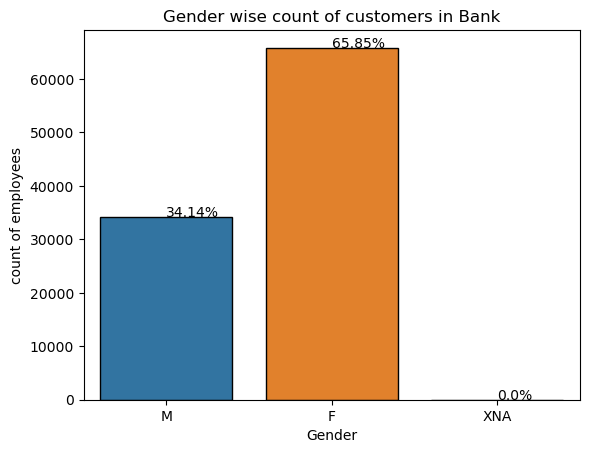

In [52]:
# Gender wise count of customers in bank 
ax = sb.countplot(x=data['GENDER'],edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('count of employees')
plt.title('Gender wise count of customers in Bank')
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/data['GENDER'].shape[0]*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))

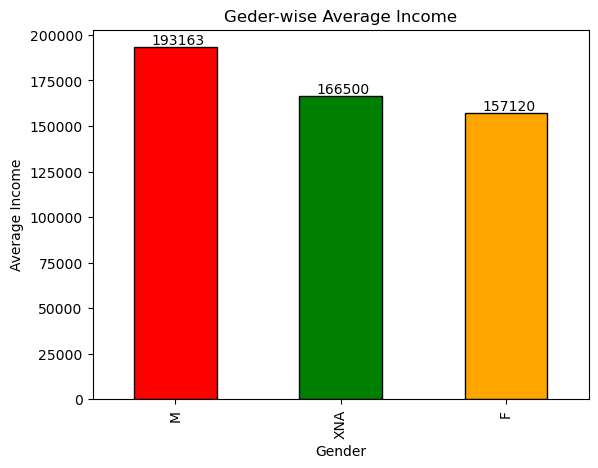

In [367]:
# Gender wise Average salary of customers
x = data.groupby('GENDER')['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False)
colors = ['red','green','orange']
ax=x.plot(kind='bar',color=colors,edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Average Income')
plt.title('Geder-wise Average Income')
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(2,5),textcoords='offset points')

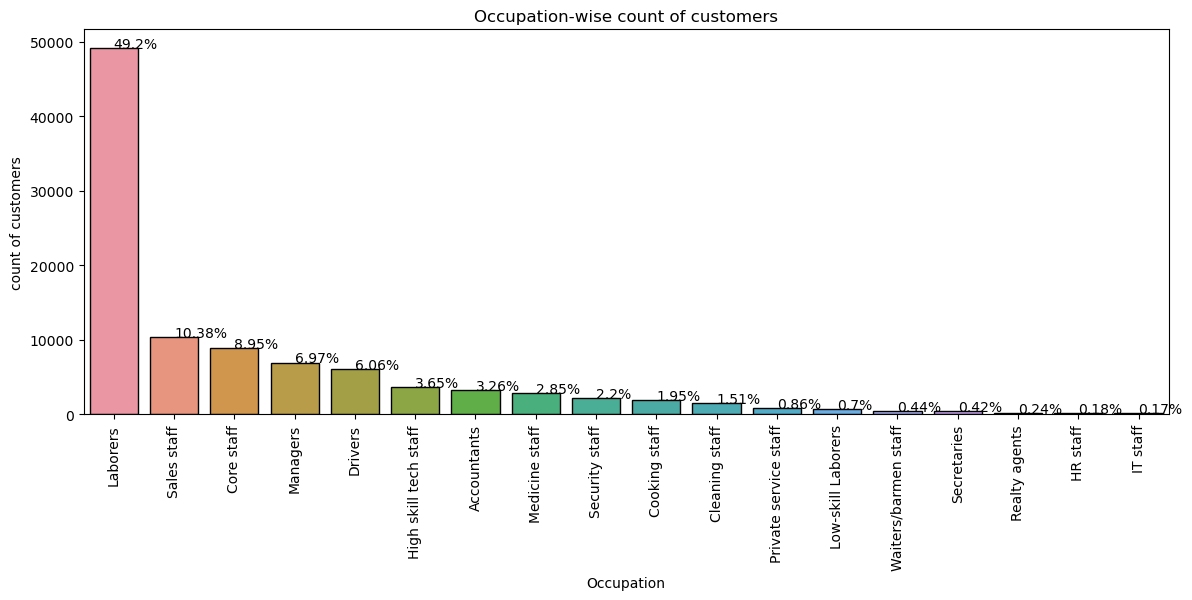

In [54]:
# Most customers are from which occupation
plt.figure(figsize=(14,5))
ax=sb.countplot(x=data['OCCUPATION_TYPE'],order=data['OCCUPATION_TYPE'].value_counts().index,edgecolor='black')
plt.xticks(rotation=90)
plt.title('Occupation-wise count of customers')
plt.xlabel('Occupation')
plt.ylabel('count of customers')
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/data['OCCUPATION_TYPE'].shape[0]*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))   

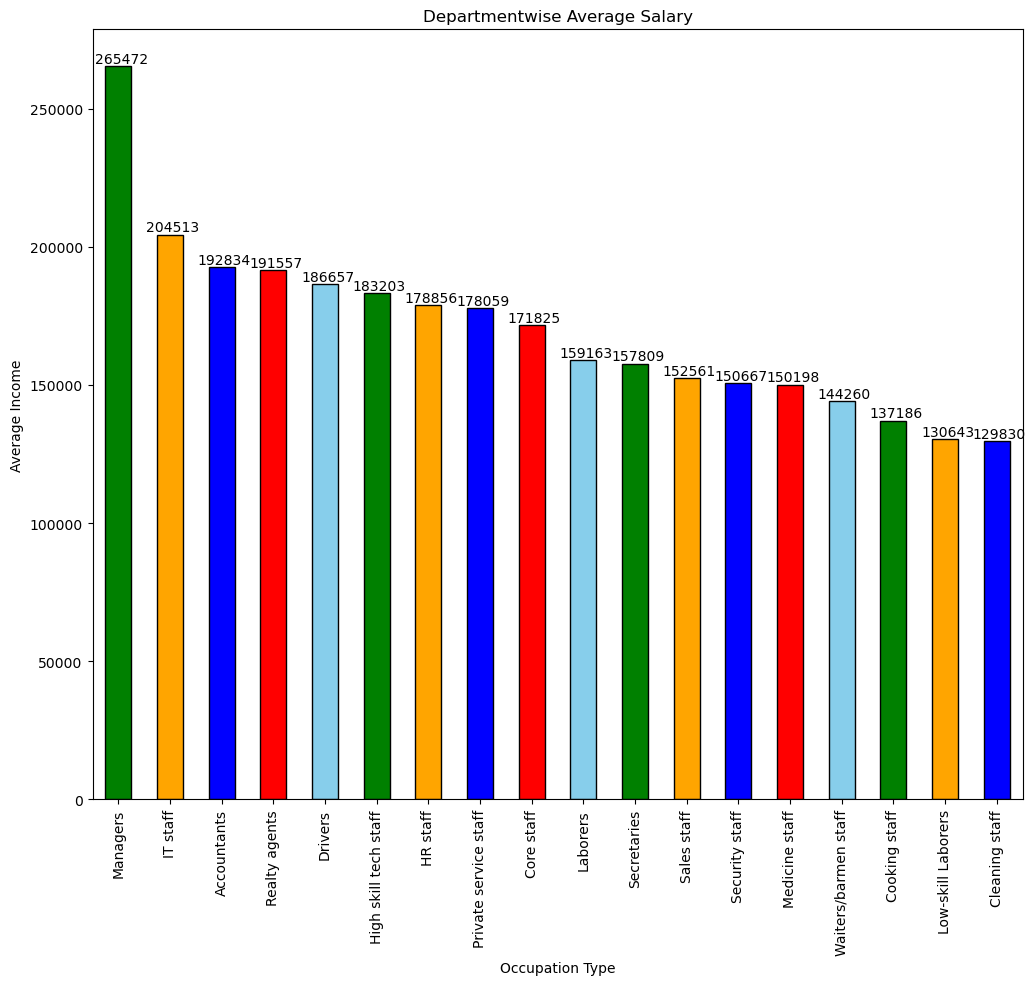

In [373]:
#Departmentwise Average Salary
x= data.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False)
colors = ['green','orange','blue','red','skyblue']
ax= x.plot(kind='bar',edgecolor='black',color=colors,figsize=(12,10))
plt.title('Departmentwise Average Salary')
plt.xlabel('Occupation Type')
plt.ylabel('Average Income')
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(2,5),textcoords='offset points')

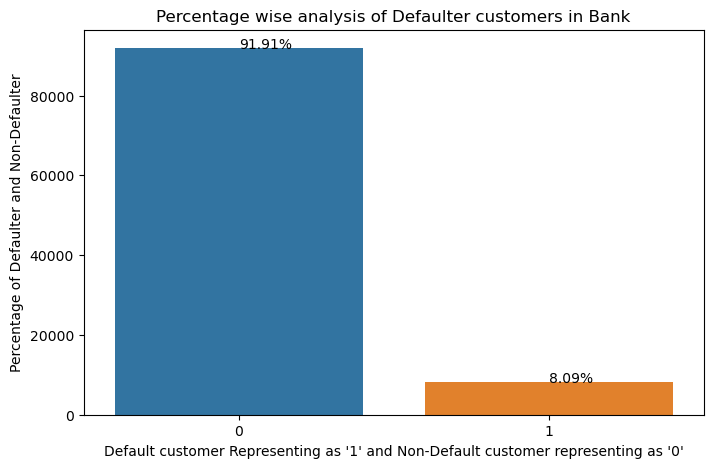

In [233]:
# Default customers Rate in Bank
plt.figure(figsize=(8,5))
ax=sb.countplot(x=data['TARGET'])
plt.xlabel("Default customer Representing as '1' and Non-Default customer representing as '0'")
plt.ylabel('Percentage of Defaulter and Non-Defaulter')
plt.title('Percentage wise analysis of Defaulter customers in Bank')
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/data['TARGET'].shape[0]*100,2)}%"
    x = bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))
    

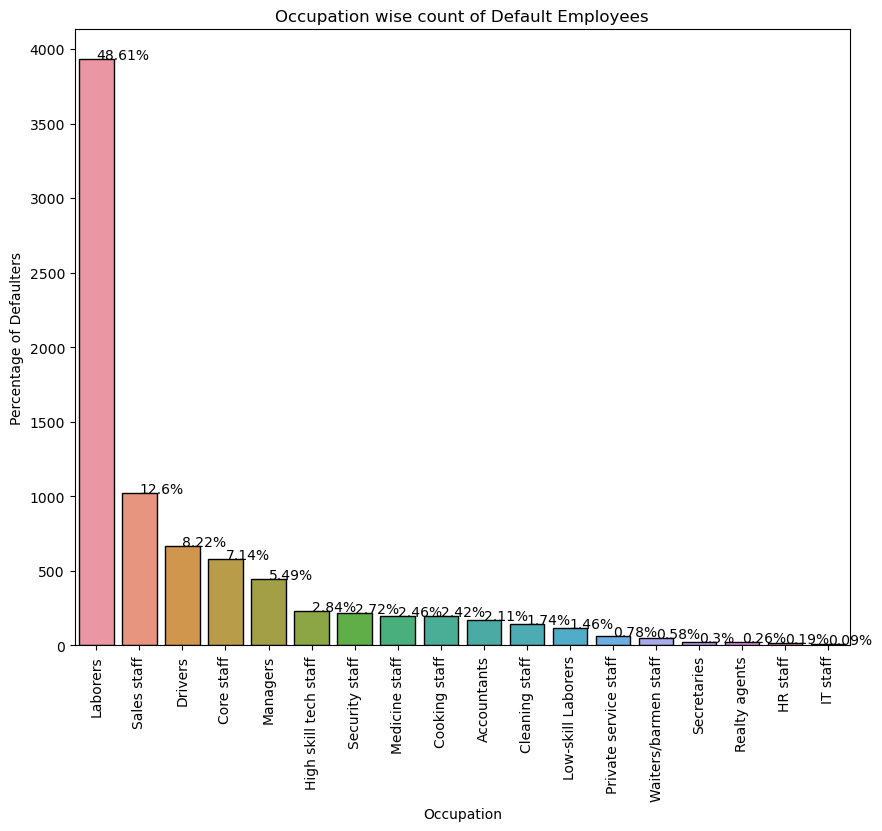

In [251]:
# Occupation wise count of Defaulters
x=data[data['TARGET']==1]
plt.figure(figsize=(10,8))
ax = sb.countplot(x=x['OCCUPATION_TYPE'],order = x['OCCUPATION_TYPE'].value_counts().index,edgecolor='black')
plt.xticks(rotation=90)
plt.title('Occupation wise count of Default Employees')
plt.xlabel('Occupation')
plt.ylabel('Percentage of Defaulters')
ti = x.shape[0]
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/ti*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))

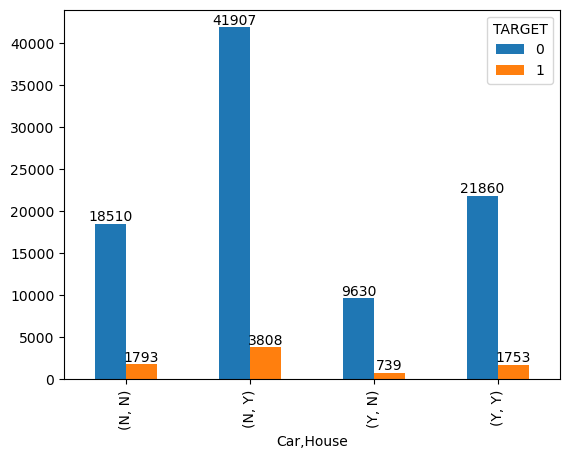

In [294]:
# which customers having car and houses have greater income
x = data.groupby(['Car','House','TARGET'])['AMT_INCOME_TOTAL'].count().unstack()
ax = x.plot(kind='bar',stacked=False)
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')


25650.0
27000.0


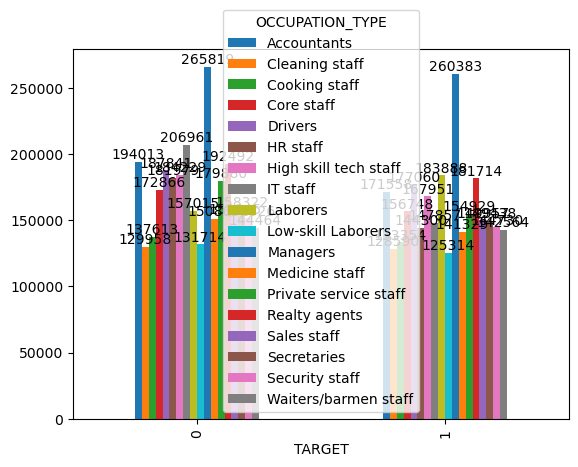

In [117]:
x = data[(data['OCCUPATION_TYPE']=='Laborers')&(data['TARGET']==1)]
y = data[(data['OCCUPATION_TYPE']=='Laborers')&(data['TARGET']==0)]
print(x['AMT_INCOME_TOTAL'].min())
print(y['AMT_INCOME_TOTAL'].min())
xy = data.groupby(['TARGET','OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean().unstack()
ax=xy.plot(kind='bar')
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')

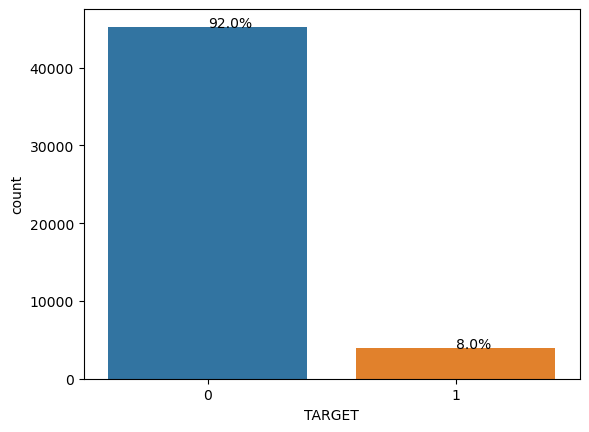

In [257]:
# how much defaulters in laborers department
x = data[data['OCCUPATION_TYPE']=='Laborers']
ax = sb.countplot(x=x['TARGET'])
ti = x.shape[0]
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/ti*100,2)}%"
    x = bar.get_x()+bar.get_width()/2
    y = bar.get_height()
    ax.annotate(percentage,(x,y))

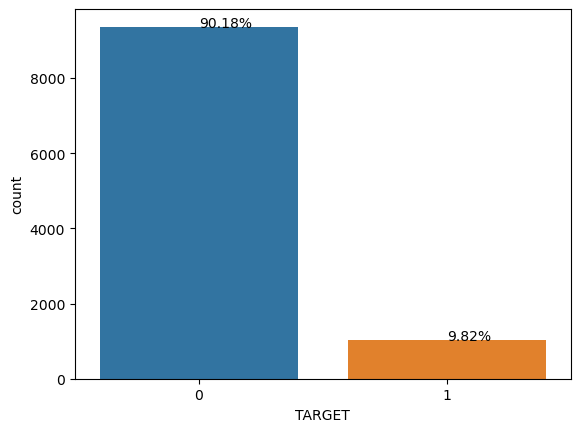

In [256]:
# How much Defaulter in Sales Staff
x = data[data['OCCUPATION_TYPE']=='Sales staff']
ax = sb.countplot(x=x['TARGET'])
ti = x.shape[0]
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/ti*100,2)}%"
    x = bar.get_x()+bar.get_width()/2
    y = bar.get_height()
    ax.annotate(percentage,(x,y))

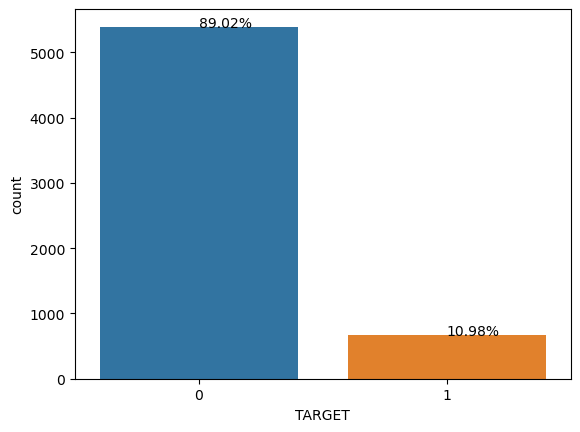

In [258]:
# How many Defaulters are Drivers
x = data[data['OCCUPATION_TYPE']=='Drivers']
ax = sb.countplot(x=x['TARGET'])
ti = x.shape[0]
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/ti*100,2)}%"
    x = bar.get_x()+bar.get_width()/2
    y = bar.get_height()
    ax.annotate(percentage,(x,y))

In [274]:
# Occupation type wise percentage of Defaulters
x = pd.crosstab(data['TARGET'],data['OCCUPATION_TYPE'],margins=True,margins_name='Total').sort_values(by='Total', axis=1, ascending=False).T
percentage_cross_tab = x.div(x['Total'], axis=0) * 100
percentage_cross_tab

TARGET,0,1,Total
OCCUPATION_TYPE,,,
Total,91.907000,8.093000,100.0
Laborers,92.004228,7.995772,100.0
Sales staff,90.176250,9.823750,100.0
Core staff,93.543342,6.456658,100.0
Managers,93.628928,6.371072,100.0
Drivers,89.020967,10.979033,100.0
High skill tech staff,93.698630,6.301370,100.0
Accountants,94.751381,5.248619,100.0
Medicine staff,93.019993,6.980007,100.0


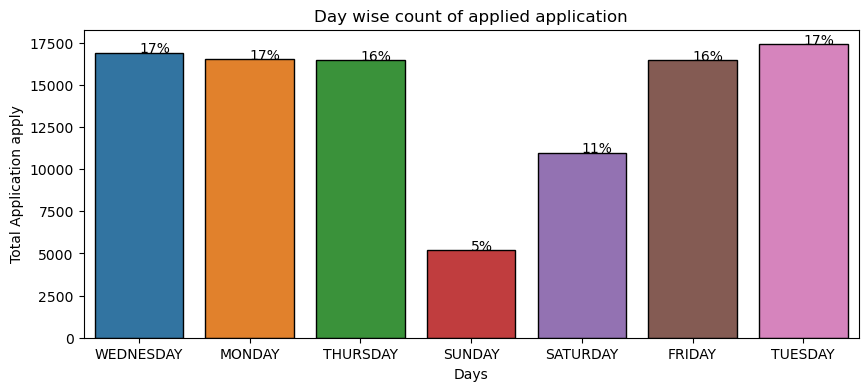

In [170]:
# In which Day mostly customers are applying the loan application 
plt.figure(figsize=(10,4))
ax = sb.countplot(x=data['APPLICATION_DAY'],edgecolor='black')
plt.title('Day wise count of applied application')
plt.xlabel('Days')
plt.ylabel('Total Application apply')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['APPLICATION_DAY'].shape[0]*100)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))

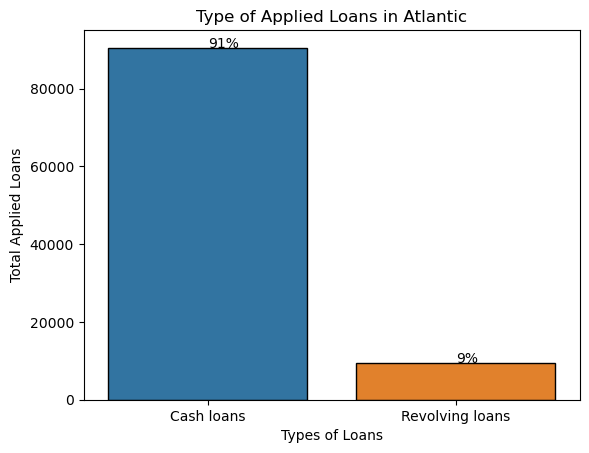

In [185]:
# Which Types of loan mostly customers are applying 
ax = sb.countplot(x = data['NAME_CONTRACT_TYPE'],edgecolor='black')
plt.title('Type of Applied Loans in Atlantic')
plt.xlabel('Types of Loans')
plt.ylabel('Total Applied Loans')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['NAME_CONTRACT_TYPE'].shape[0]*100)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))
plt.show()

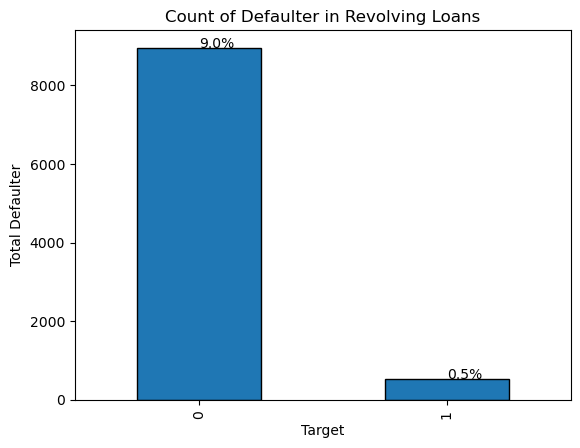

In [181]:
# Defaulter in Revolving Loans
x = data[data['NAME_CONTRACT_TYPE']=='Revolving loans']
xx = x.groupby('TARGET')['NAME_CONTRACT_TYPE'].count().sort_values(ascending =False)
ax = xx.plot(kind='bar',edgecolor='black')
plt.title('Count of Defaulter in Revolving Loans')
plt.xlabel('Target')
plt.ylabel('Total Defaulter')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['NAME_CONTRACT_TYPE'].shape[0]*100,1)}%"
    x = bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))
plt.show()

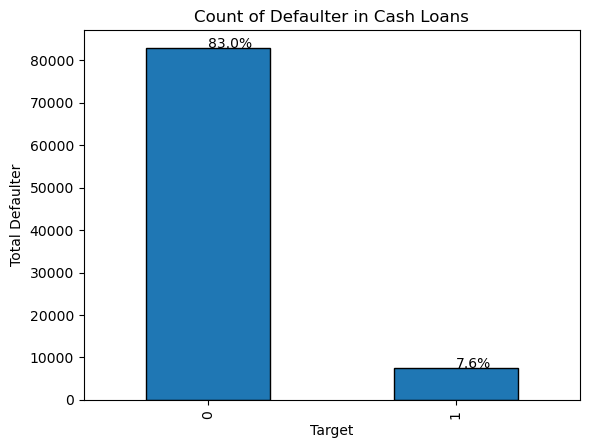

In [179]:
# Defaulter in Cash Loans
x = data[data['NAME_CONTRACT_TYPE']=='Cash loans']
xx = x.groupby('TARGET')['NAME_CONTRACT_TYPE'].count().sort_values(ascending =False)
ax = xx.plot(kind='bar',edgecolor='black')
plt.title('Count of Defaulter in Cash Loans')
plt.xlabel('Target')
plt.ylabel('Total Defaulter')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['NAME_CONTRACT_TYPE'].shape[0]*100,1)}%"
    x = bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))
plt.show()

In [334]:
 pd.crosstab(data['NAME_INCOME_TYPE'],data['TARGET'],margins=True,margins_name='Total').sort_values(by=1,ascending=False)


TARGET,0,1,Total
NAME_INCOME_TYPE,,,
Total,91907,8093,100000
Working,46924,4978,51902
Commercial associate,21491,1726,23217
Pensioner,16879,978,17857
State servant,6593,407,7000
Unemployed,6,4,10
Businessman,4,0,4
Maternity leave,1,0,1
Student,9,0,9


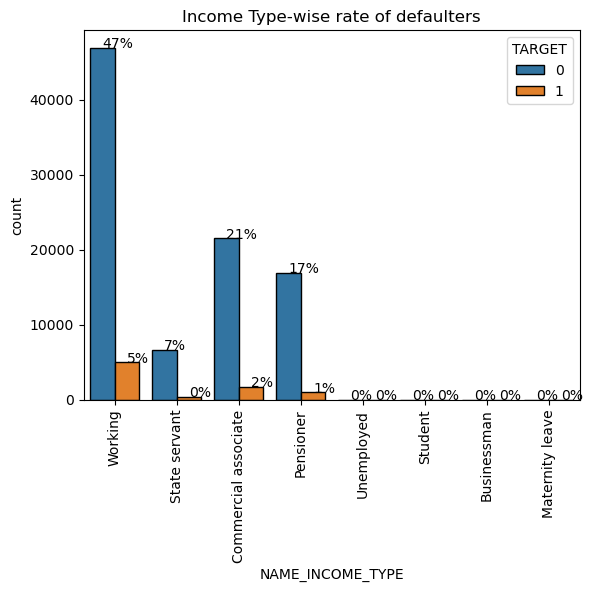

In [339]:
#Income Type-wise rate of defaulters
ax = sb.countplot(x=data['NAME_INCOME_TYPE'],hue=data['TARGET'],edgecolor='black')
plt.xticks(rotation=90)
plt.title('Income Type-wise rate of defaulters')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['NAME_CONTRACT_TYPE'].shape[0]*100)}%"
    x = bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))
plt.show()
plt.show()

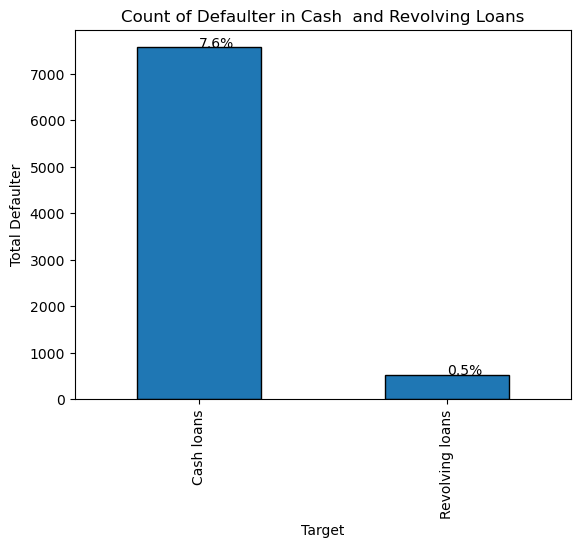

In [183]:
#NAME_CONTRACT_TYPE-wise defaulter percentage
x= data[data['TARGET']==1]
xx = x.groupby('NAME_CONTRACT_TYPE')['TARGET'].count()
ax = xx.plot(kind='bar',edgecolor='black')
plt.title('Count of Defaulter in Cash  and Revolving Loans')
plt.xlabel('Target')
plt.ylabel('Total Defaulter')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['NAME_CONTRACT_TYPE'].shape[0]*100,1)}%"
    x = bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))
plt.show()

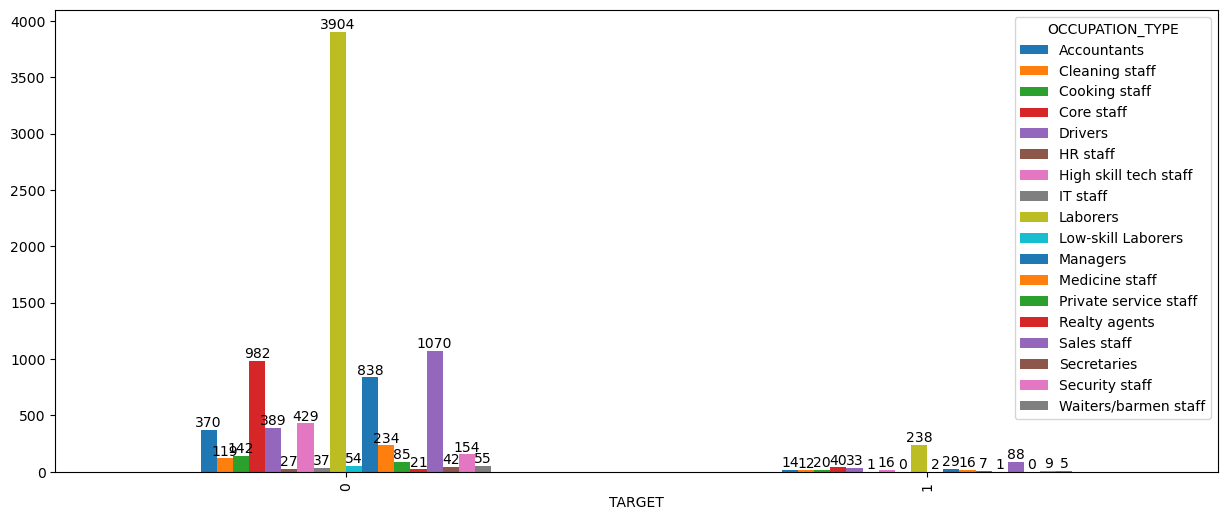

In [168]:
# occupation-wise total defaulter in Atlantis
x = data[data['NAME_CONTRACT_TYPE']=='Revolving loans']
xx = x.groupby('TARGET')['OCCUPATION_TYPE'].value_counts().unstack()
ax = xx.plot(kind='bar',stacked=False,figsize=(15,6))
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')


In [11]:
cat=data.select_dtypes(include='object')
num=data.select_dtypes(include='number')

In [22]:
from scipy.stats import skew
num=data.select_dtypes(include='number')
def analyze_column(column_name):
    column_data=data[column_name]
    mean=column_data.mean()
    median=column_data.median()
    missing_values=column_data.isnull().sum()
    skewness=skew(column_data)
    
    print('column_name',column_name)
    print('mean',mean)
    print('median',median)
    print('missing values',missing_values)
    print('skewness',skewness)

for column in num:
    analyze_column(column)
    

column_name SK_ID_CURR
mean 158006.14086
median 157877.0
missing values 0
skewness 0.003997996042341984
column_name TARGET
mean 0.08093
median 0.0
missing values 0
skewness 3.073176491953965
column_name CNT_CHILDREN
mean 0.41739
median 0.0
missing values 0
skewness 1.8628807299908063
column_name AMT_INCOME_TOTAL
mean 169426.07027325002
median 144000.0
missing values 0
skewness 282.94380794113465
column_name AMT_CREDIT
mean 599003.4465
median 513040.5
missing values 0
skewness 1.2093754520514397
column_name AMT_GOODS_PRICE
mean 538150.2894
median 450000.0
missing values 0
skewness 1.3292488257071369
column_name DAYS_EMPLOYED
mean 63292.22206
median -1219.0
missing values 0
skewness 1.6769118069097724
column_name MOBILE
mean 0.99999
median 1.0
missing values 0
skewness -316.22302258058363
column_name WORK_PHONE
mean 0.82128
median 1.0
missing values 0
skewness -1.6771869920937
column_name HOME_PHONE
mean 0.19974
median 0.0
missing values 0
skewness 1.502032736989328
column_name MOBILE_RE

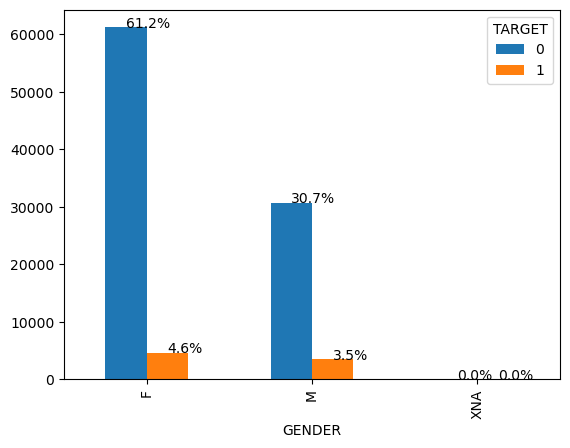

In [195]:
x = data.groupby(['GENDER','TARGET'])['TARGET'].count().unstack()
ax = x.plot(kind='bar')
for bar in ax.patches:
    percentage = f"{round(bar.get_height()/data['TARGET'].shape[0]*100,1)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))

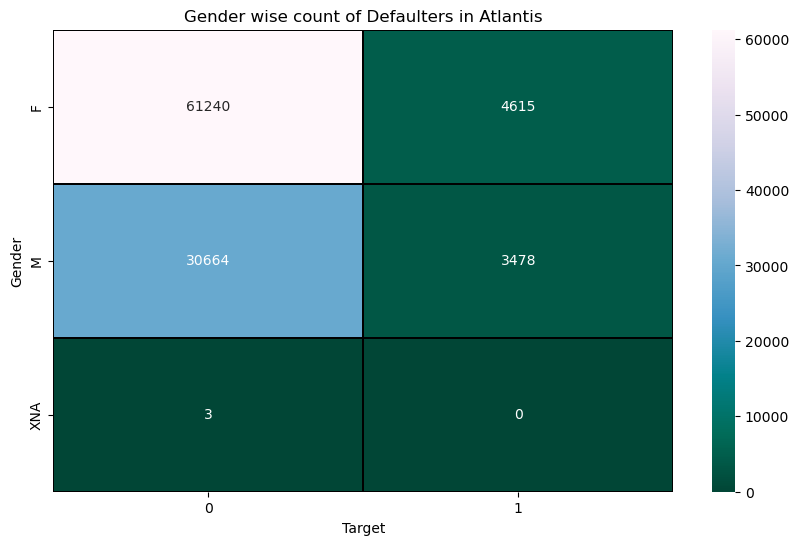

In [7]:
# Gender wse count of Defaulters
plt.figure(figsize=(10,6))
sb.heatmap(pd.crosstab(index=data['GENDER'],columns=data['TARGET']),annot=True,
           fmt='.0f',cmap='PuBuGn_r',linecolor='black',linewidths=.2)
plt.title('Gender wise count of Defaulters in Atlantis')
plt.xlabel('Target')
plt.ylabel('Gender')
plt.show()

In [209]:
x=data[data['TARGET']==1]
ax = x.groupby('OCCUPATION_TYPE')['TARGET'].count()
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/data['TARGET'].shape[0]*100,2)}%"
    x = bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))

AttributeError: 'Series' object has no attribute 'patches'

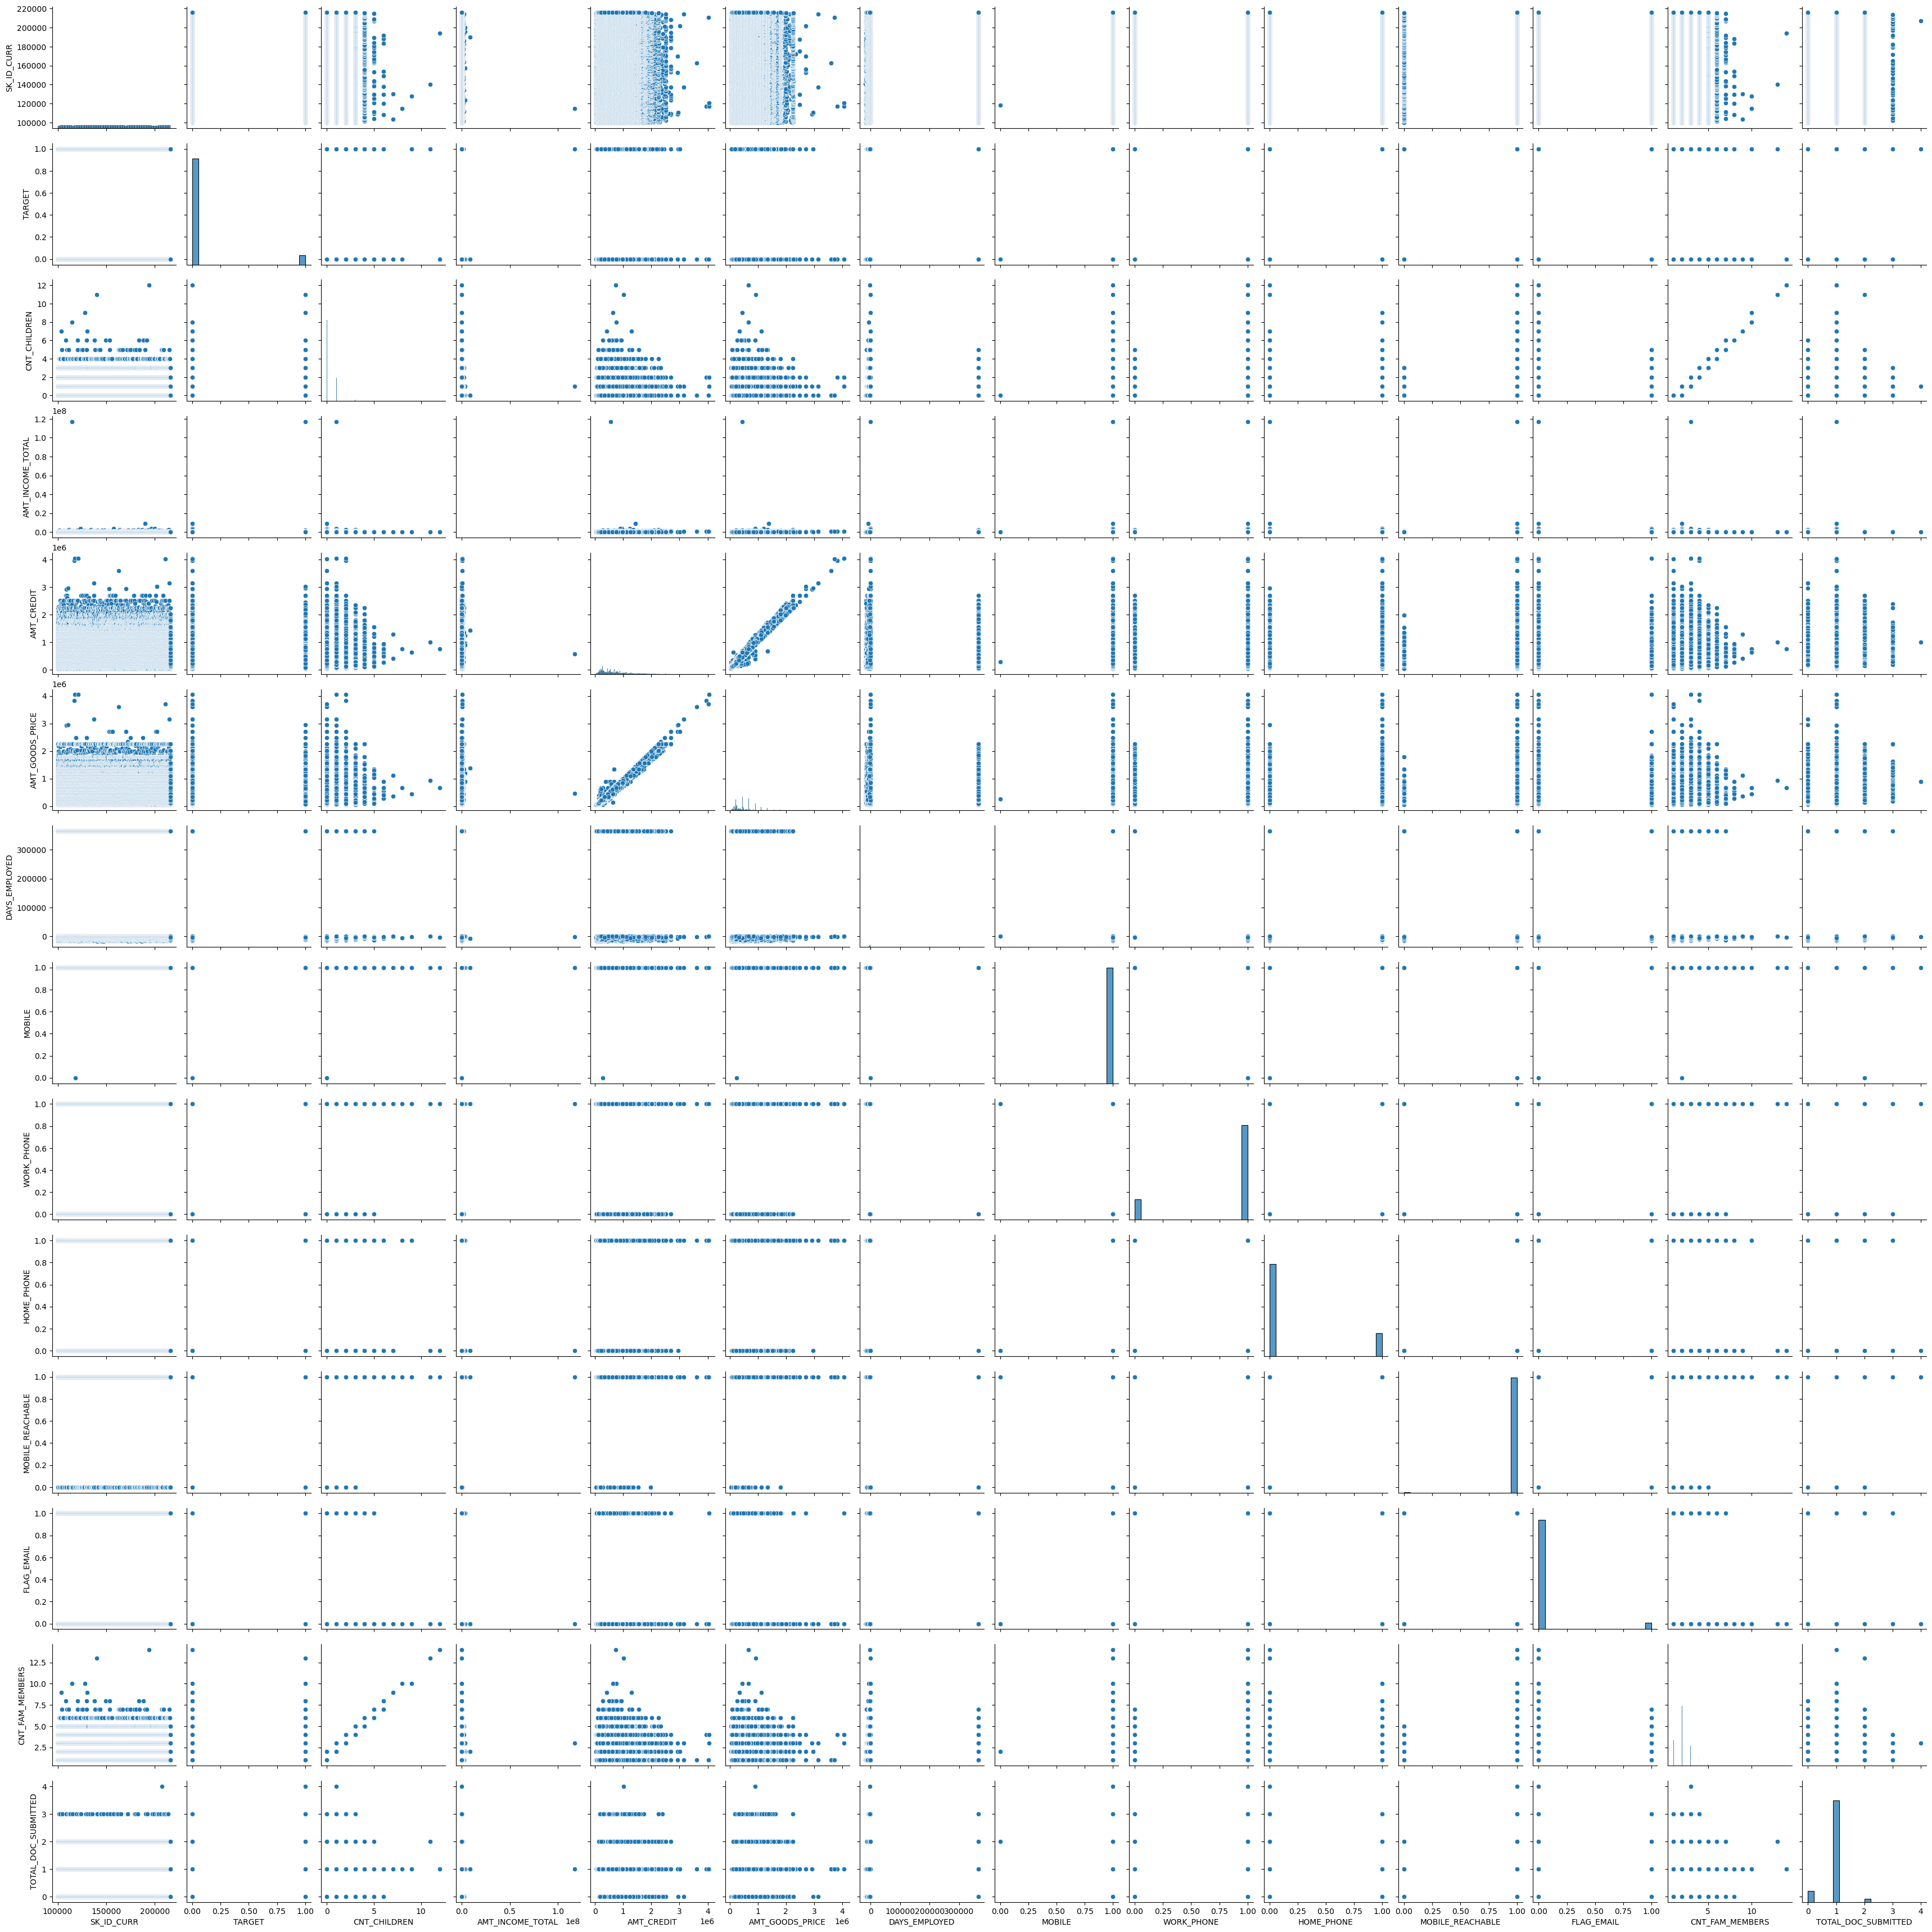

In [305]:
#Multivariate analysis on numerical columns
num = data.select_dtypes(include='number')
sb.pairplot(num)

In [304]:
def analyze(dataframe):
    categorical_column = []
    numerical_column = []
    for column in data.columns:
        if dataframe[column].dtype == 'object' or dataframe[column].nunique()<=30:
            categorical_column.append(column)
        else:
            numerical_column.append(column)
    return categorical_column,numerical_column
categorical_column,numerical_column = analyze(data)
categorical_column

['TARGET',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'APPLICATION_DAY',
 'TOTAL_DOC_SUBMITTED']

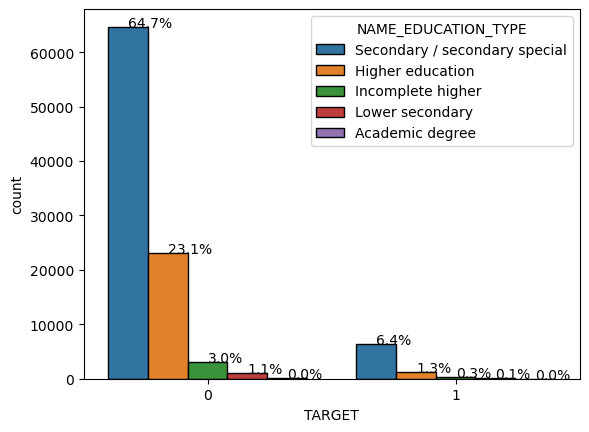

In [362]:
# Target-wise analysis on Education Type 
ax = sb.countplot(x=data['TARGET'],hue=data['NAME_EDUCATION_TYPE'],edgecolor='black')
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/data['TARGET'].shape[0]*100,1)}%"
    x = bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y))

# (Observation)
- Almost 66% customers of Atlantis are Females and 34% customers are Males.
- But income-wise Males having greater income than females customer.
- In which Mostly defaulters are females but average-wise maximum defaulter are Males.
- Almost 50% of customers are from labour background.
- In which out of 8093 defaulters 3934 are from labour department.
- Defaulter rate is increasing as the Income is Decreasing.
- Approving loansto Accountants,Mangers and IT staff have a less chance to become defaulter.
- But, Department-wise Average salary is highest in managers.
- Almost 91% of customers are applying for cash loans and 9% applying for Revolving loans.
- In which 7.6% defaulter are lies on cash loans and 0.5% defaulter lies on revolving loans.
- Only 5% of application were applied on sunday.



 # (Recommedation)
- Bank should not give loan to those people who are unemployed.
- When giving loan to low-skilled labour, cleaning staff, waiter, cooking staff, Driver, Sales staff check weather they have their own house or car and good income.
- Gender give priority to females because they have very less defaulters.
- Defaulter rate is increasing as the Income is Decreasing. So give priority to those people who have good income.
- Bank should take an holiday on Sunday or can less the staff because very few customers are applying on that day.
